In [1]:
%matplotlib inline
import numpy as np

In [2]:
import torch
from torchwi import Time2d
from torchwi.io import rsf, TimeForwardDataset
import time

In [3]:
fwav="../data_marm/wavelet.rsf"
fshot="../data_marm/shot.rsf"
fvel="../data_marm/marm.rsf"

nt,dt,w = rsf.fromfile(fwav,"n1 d1 data")
ny,nx,h,vel = rsf.fromfile(fvel,"n1 n2 d1 data")
nshot,sxy = rsf.fromfile(fshot,"n2 data")

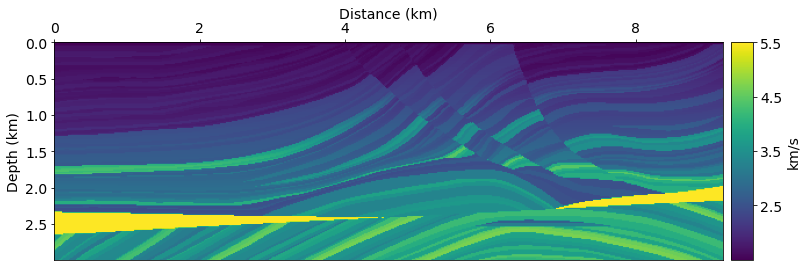

In [4]:
from torchwi.utils.plot import plot_vel
plot_vel(vel,h)

In [5]:
DEVICE='cuda'

vp=torch.from_numpy(vel).to(DEVICE)
w=torch.from_numpy(w)
sxy=torch.from_numpy(sxy).to(DEVICE)

In [6]:
dataloader = torch.utils.data.DataLoader(TimeForwardDataset(sxy))

In [7]:
order=8

model = Time2d(nx,ny,h,w,dt,order,DEVICE)

In [8]:
with torch.no_grad():
    for sx,sy,ishot in dataloader:
        print("[%s] ishot=%d, sx=%s"%(time.ctime(),ishot,sx))
        ry=sy
        seismo = model(vp,sx,sy,ry)
        seismo.to('cpu').detach().numpy().tofile("seismo.%04d"%ishot)

[Tue Nov  3 20:18:12 2020] ishot=0, sx=tensor([0.0960], device='cuda:0')
[Tue Nov  3 20:18:12 2020] ishot=1, sx=tensor([0.1920], device='cuda:0')
[Tue Nov  3 20:18:12 2020] ishot=2, sx=tensor([0.2880], device='cuda:0')
[Tue Nov  3 20:18:12 2020] ishot=3, sx=tensor([0.3840], device='cuda:0')
[Tue Nov  3 20:18:12 2020] ishot=4, sx=tensor([0.4800], device='cuda:0')
[Tue Nov  3 20:18:12 2020] ishot=5, sx=tensor([0.5760], device='cuda:0')
[Tue Nov  3 20:18:13 2020] ishot=6, sx=tensor([0.6720], device='cuda:0')
[Tue Nov  3 20:18:13 2020] ishot=7, sx=tensor([0.7680], device='cuda:0')
[Tue Nov  3 20:18:13 2020] ishot=8, sx=tensor([0.8640], device='cuda:0')
[Tue Nov  3 20:18:13 2020] ishot=9, sx=tensor([0.9600], device='cuda:0')
[Tue Nov  3 20:18:13 2020] ishot=10, sx=tensor([1.0560], device='cuda:0')
[Tue Nov  3 20:18:13 2020] ishot=11, sx=tensor([1.1520], device='cuda:0')
[Tue Nov  3 20:18:13 2020] ishot=12, sx=tensor([1.2480], device='cuda:0')
[Tue Nov  3 20:18:14 2020] ishot=13, sx=tensor([

min=-4.1253797e-06 max=3.6732577e-06


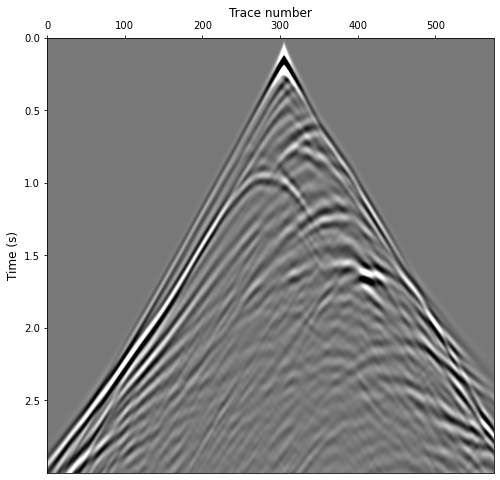

In [9]:
from torchwi.utils.plot import plot_seismo
seismo = np.fromfile("seismo.0050",dtype=np.float32)
seismo.shape=(nt,nx)

plot_seismo(seismo.T,dt,perc=99)